In [1]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px

In [2]:
# import data 
df = pd.read_csv('banking_churn.csv')
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

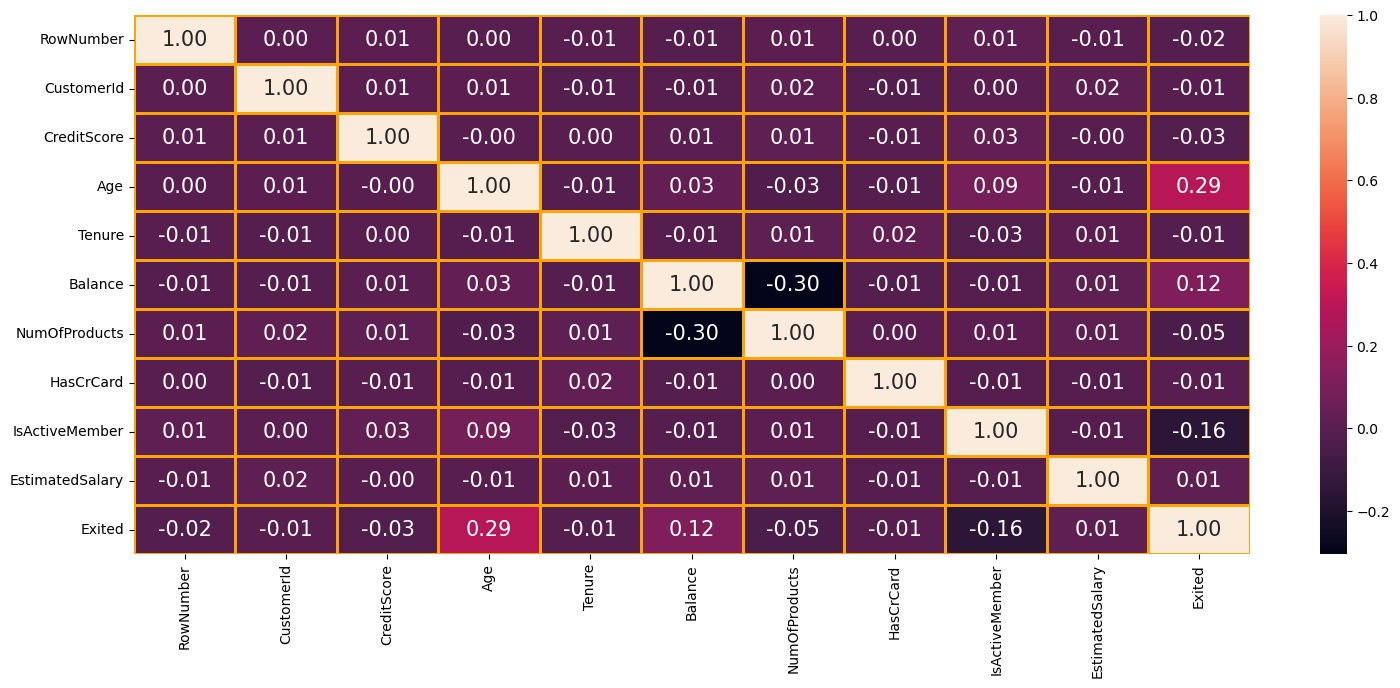

In [6]:
plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

In [7]:
num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')

In [8]:
num_cols.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [9]:
cat_cols.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

### Drop unnecessary columns

In [10]:
# Dropping columns that have no effect on the customer exiting the banking service

df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')

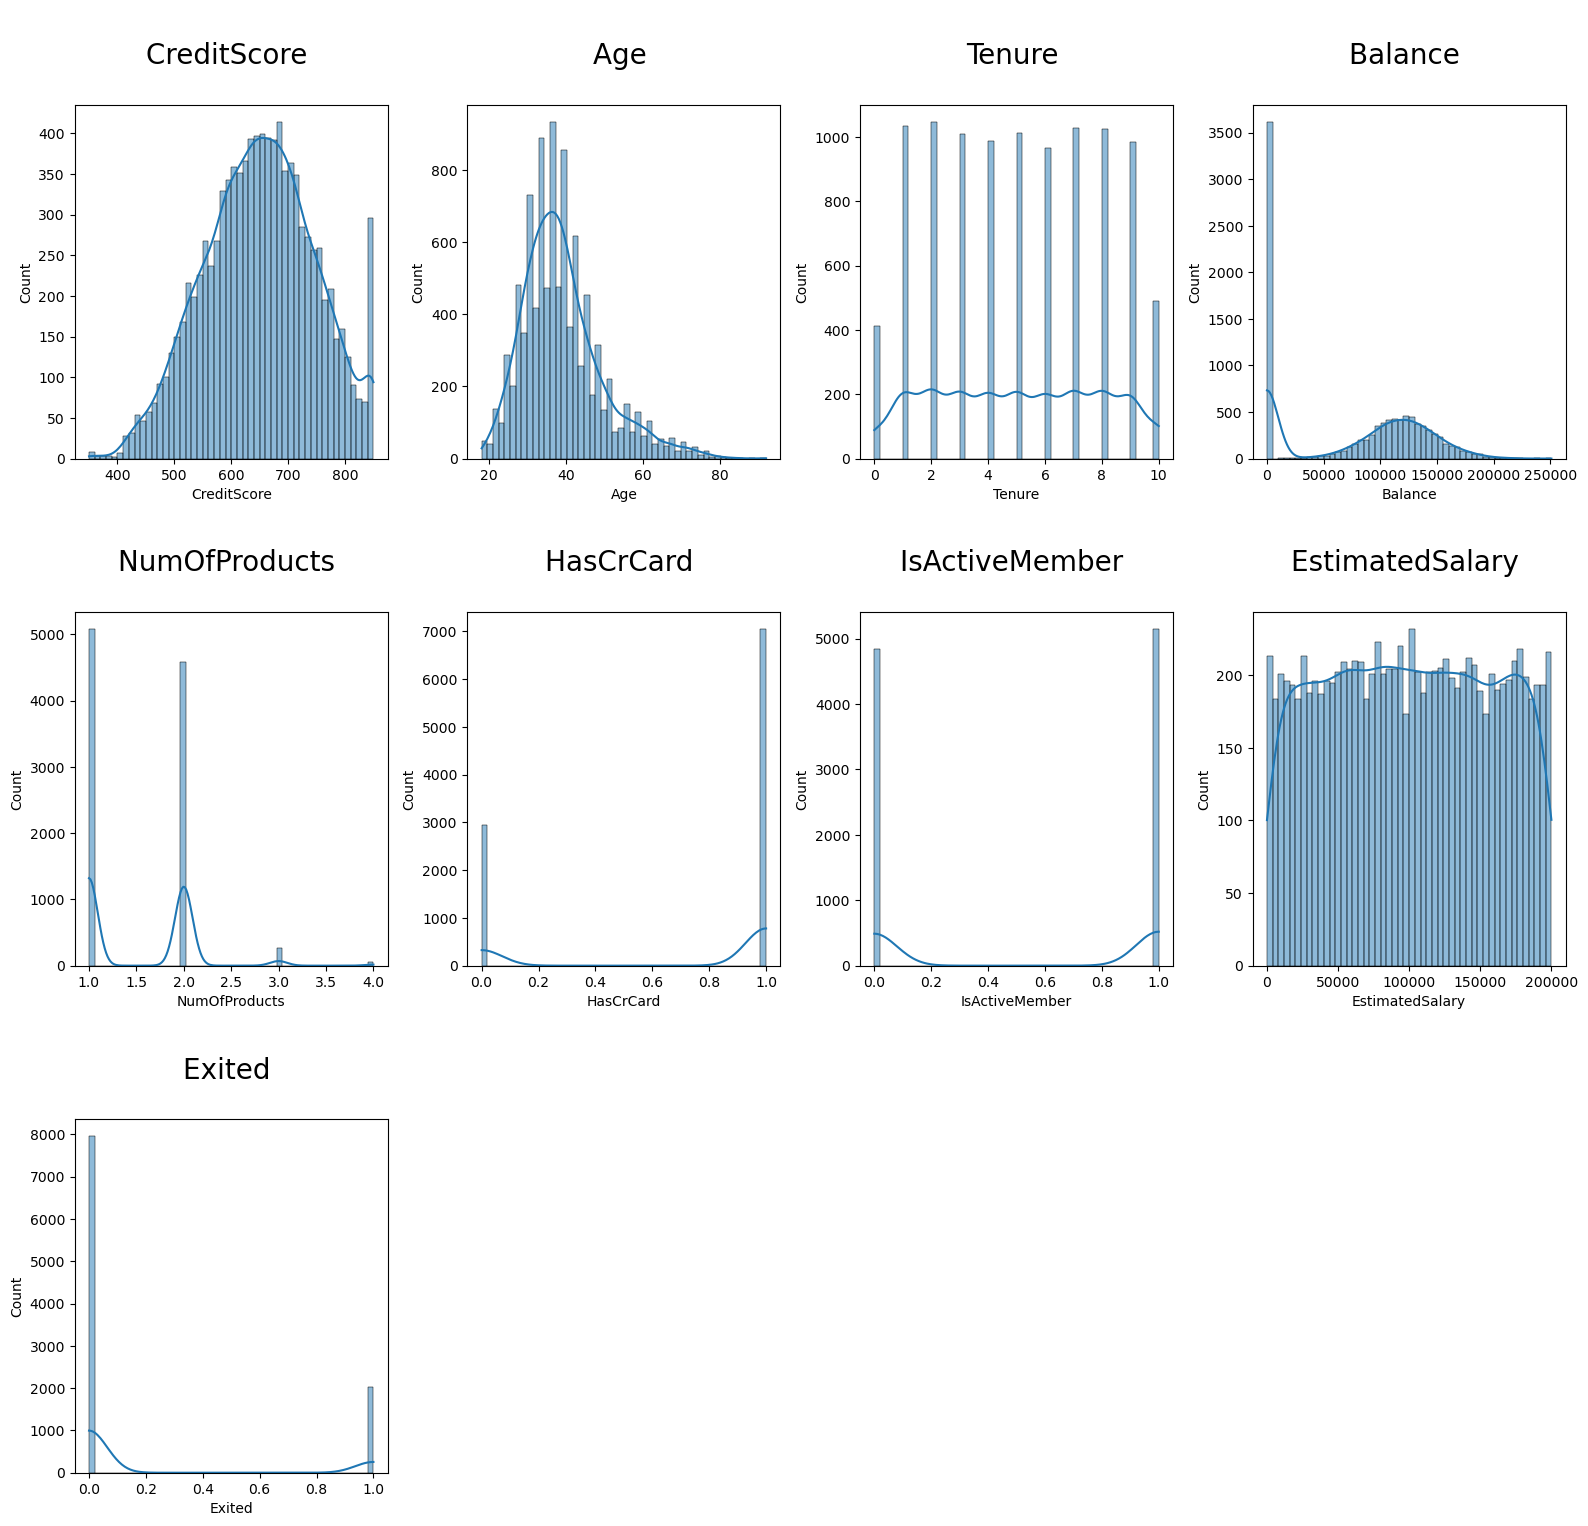

In [13]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(x = cols[i], data = df, ax = ax, palette='rocket', kde = True, bins = 50)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

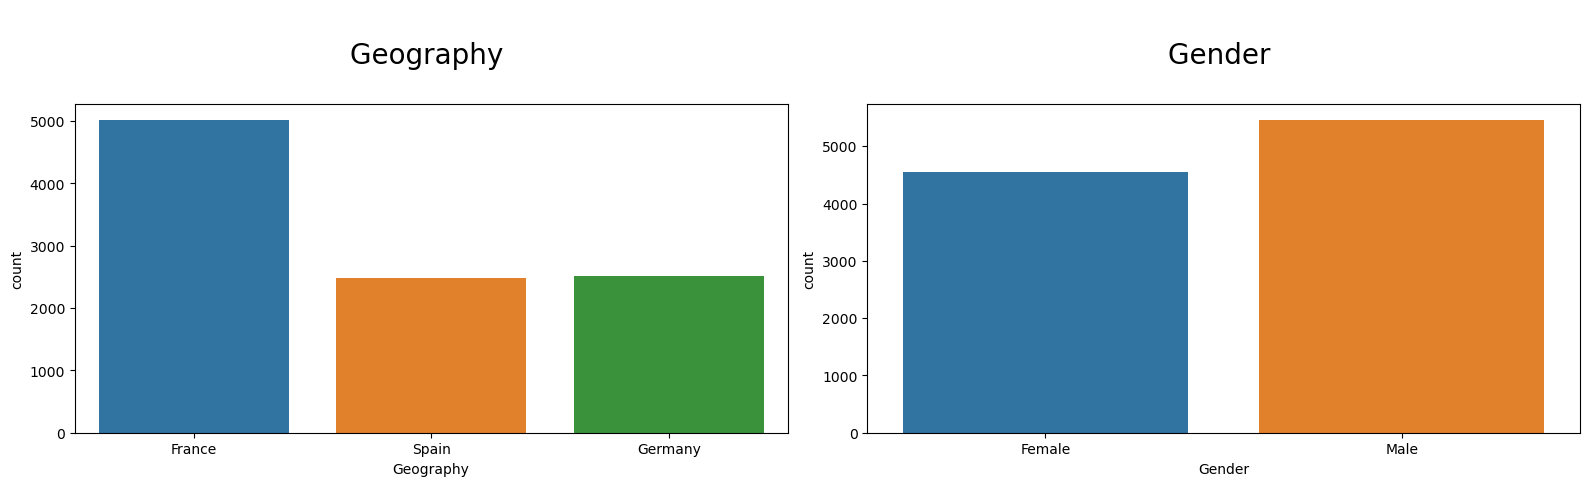

In [14]:
cols = cat_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(0, len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

#### Split the predictor variables from target variable.

In [15]:
X = df.drop(columns = 'Exited', axis = 1)
y = df['Exited']

### Encoding Nominal Variables

In [16]:
X = pd.get_dummies(X, drop_first = True)
X.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1
9999,792,28,4,130142.79,1,1,0,38190.78,0,0,0


In [17]:
X['Gender_Male'].value_counts()

1    5457
0    4543
Name: Gender_Male, dtype: int64

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [19]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [20]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Exited
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


### Split Traing and testing data

In [21]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [22]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4466,413,35,2,0.00,2,1,1,60972.84,0,1,1
3754,535,35,8,118989.92,1,1,1,135536.72,0,1,1
9601,659,33,7,89939.62,1,1,0,136540.09,0,0,0
9758,556,43,4,125890.72,1,1,1,74854.97,1,0,0
8577,754,65,1,136186.44,1,1,1,121529.59,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7788,551,76,2,128410.71,2,1,1,181718.73,0,1,1
1650,625,34,6,0.00,2,0,0,197283.20,0,0,1
1276,635,37,5,113488.68,1,1,0,95611.74,1,0,1
1043,579,35,1,0.00,2,1,0,4460.20,0,0,1


In [3]:
## Basics 
import numpy as np
import pandas as pd
## Visualization
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
## ML
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
## Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
np.random.seed(42)

In [32]:
## Creat list of classifiers we're going to try out
classifiers = [
KNeighborsClassifier(),
SVC(random_state=123),
DecisionTreeClassifier(random_state=123),
RandomForestClassifier(random_state=123),
AdaBoostClassifier(random_state=123),
]
classifier_names = [
'KNeighborsClassifier()',
'SVC()',
'DecisionTreeClassifier()',
'RandomForestClassifier()',
'AdaBoostClassifier()',
]
model_scores = []
## Looping through the classifiers
for classifier, name in zip(classifiers, classifier_names):
  pipe = Pipeline(steps=[
  #('preprocessor', preprocessor),
  ('selector', SelectKBest(k=len(X.columns))),
  ('classifier', classifier)])
  score = cross_val_score(pipe, X, y, cv=10, scoring='roc_auc').mean() 
  model_scores.append(score)

#create dataframe to identify the best classifier
model_performance = pd.DataFrame({
  'Classifier':
    classifier_names,  
  'Cross-validated AUC':
    model_scores
}).sort_values('Cross-validated AUC', ascending = False, ignore_index=True)
display(model_performance)

,Classifier,Cross-validated AUC
0,RandomForestClassifier(),0.855712
1,AdaBoostClassifier(),0.848673
2,DecisionTreeClassifier(),0.691094
3,SVC(),0.561407
4,KNeighborsClassifier(),0.529721


In [24]:
# We'll use a Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
## Basics 
import numpy as np
import pandas as pd

## Visualization
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

## ML
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve

## Algorithms
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
np.random.seed(42)

# import data 
df = pd.read_csv('banking_churn.csv')

# drop all rows that are not relavant in building the model (RowNumber, CustomerID, Surname)
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Geography", "Gender"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

Balance_feature = ["Balance"]
Balance_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))])

numeric_features = ["CreditScore","EstimatedSalary","IsActiveMember","NumOfProducts","Tenure","Age","Balance"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("Balance", Balance_transformer, Balance_feature),
        ("num", numeric_transformer, numeric_features)])

# Split the predictor variables from target variable
X = df.drop(columns = 'Exited', axis = 1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Using grid search with pipeline for hyperparameter tuning
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [500,10],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto", "sqrt"],
    "model__min_samples_split": [2, 4]
}

# Create a preprocessing and modelling pipeline
finalPipeline = Pipeline(steps=[("preprocessor", preprocessor),
                        ('scaler', StandardScaler()),
                        ("model", RandomForestClassifier())])

gs_model = GridSearchCV(finalPipeline, pipe_grid, cv=5, verbose=3)
gs_model.fit(X_train, y_train)

# Score the best model
gs_model.score(X_test, y_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=mean;, score=0.863 total time=   2.6s
[CV 2/5] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=mean;, score=0.861 total time=   2.4s
[CV 3/5] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=mean;, score=0.861 total time=   2.4s
[CV 4/5] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=mean;, score=0.857 total time=   2.4s
[CV 5/5] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=mean;, score=0.861 total t

[CV 4/5] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=mean;, score=0.859 total time=   2.4s
[CV 5/5] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=mean;, score=0.854 total time=   2.3s
[CV 1/5] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=median;, score=0.863 total time=   2.4s
[CV 2/5] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=median;, score=0.863 total time=   2.4s
[CV 3/5] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=median;, score=0.856 total time=   2.4s
[CV 4/5] END model__max_depth=None, model__m

[CV 3/5] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=median;, score=0.840 total time=   1.2s
[CV 4/5] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=median;, score=0.837 total time=   1.2s
[CV 5/5] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=500, preprocessor__num__imputer__strategy=median;, score=0.844 total time=   1.3s
[CV 1/5] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=mean;, score=0.858 total time=   0.0s
[CV 2/5] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=mean;, score=0.848 total time=   0.0s
[CV 3/5] END model__max_depth=5, model__max_features=auto, mo

[CV 5/5] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=mean;, score=0.841 total time=   0.0s
[CV 1/5] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=median;, score=0.857 total time=   0.0s
[CV 2/5] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=median;, score=0.851 total time=   0.0s
[CV 3/5] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=median;, score=0.843 total time=   0.0s
[CV 4/5] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=10, preprocessor__num__imputer__strategy=median;, score=0.838 total time=   0.0s
[CV 5/5] END model__max_depth=5, model__max_features=sqrt, mod

0.867

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_model.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 86.70%
Precision: 0.78
Recall: 0.48
F1 score: 0.60


In [10]:
# Export the ML model
import pickle
with open(r'churn_model.pickle', 'wb') as f:
    pickle.dump(gs_model, f)

In [1]:
# Dash_App.py
# Import Packages
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output, State
import dash_bootstrap_components as dbc
import numpy as np
import pandas as pd
import pickle

# Setup
app = dash.Dash(__name__)
app.title = 'Machine Learning Model Deployment'
server = app.server

# load ML model
with open('churn_model.pickle', 'rb') as f:
    clf = pickle.load(f)
    
# App Layout 
app.layout = html.Div([
    dbc.Row([html.H3(children='Predict Banking Customer Churn')]),
    dbc.Row([
        dbc.Col(html.Label(children='Credit Score:'), width={"order": "first"}),
        dbc.Col(dcc.Input(id='CreditScore', type='number', value=619, min=0, max=10000, step=1)) 
    ]),
    dbc.Row([
        dbc.Col(html.Label("Geography:")),
        dbc.Col(dcc.Checklist(
            options=[{"label": "Germany", "value": 1},{"label": "France", "value": 2},{"label": "Spain", "value": 3},{"label": "unknown", "value": 4},],
            value='value_3',
            id="Geography",
            inline=True,
        ))
    ]),
    dbc.Row([
        dbc.Col(html.Label("Gender:")),
        dbc.Col(dcc.Checklist(
            options=[{"label": "Male", "value": 1},{"label": "France", "value": 2},],
            value='value_2',
            id="Gender",
            inline=True,
        ))
    ]),
    dbc.Row([
        dbc.Col(html.Label(children='Age:'), width={"order": "first"}),
        dbc.Col(dcc.Input(id='Age', type='number', value=42, min=0, max=100, step=1)) 
    ]),
    dbc.Row([
        dbc.Col(html.Label(children='Tenure:'), width={"order": "first"}),
        dbc.Col(dcc.Input(id='Tenure', type='text', value=8))  
    ]),
    dbc.Row([
        dbc.Col(html.Label(children='Balance:'), width={"order": "first"}),
        dbc.Col(dcc.Input(id='Balance', type='text', value=159660.80))  
    ]),  
    dbc.Row([
        dbc.Col(html.Label(children='Number of Products:'), width={"order": "first"}),
        dbc.Col(dcc.Input(id='NumOfProducts', type='text', value=3)) 
    ]),
    dbc.Row([
        dbc.Col(html.Label(children='Has Credit Card:'), width={"order": "first"}),
        dbc.Col(dcc.Input(id='HasCrCard', type='text', value=1)) 
    ]),
    dbc.Row([
        dbc.Col(html.Label(children='Is Active Member:'), width={"order": "first"}),
        dbc.Col(dcc.Input(id='IsActiveMember', type='text', value=0))  
    ]),
    dbc.Row([
        dbc.Col(html.Label(children='Estimated Salary:'), width={"order": "first"}),
        dbc.Col(dcc.Input(id='EstimatedSalary', type='text', value=113931.57))  
    ]),
    dbc.Row([dbc.Button('Submit', id='submit-val', n_clicks=0, color="primary")]),
    html.Br(),
    dbc.Row([html.Div(id='prediction output')])
    
    ], style = {'padding': '0px 0px 0px 150px', 'width': '50%'})
# Callback to produce the prediction 
@app.callback(
    Output('prediction output', 'children'),
    Input('submit-val', 'n_clicks'),
    State('CreditScore', 'value'),
    State('Geography', 'value'),
    State('Gender', 'value'),
    State('Age', 'value'),
    State('Tenure', 'value'), 
    State('Balance', 'value'),
    State('NumOfProducts', 'value'),
    State('HasCrCard', 'value'),
    State('IsActiveMember', 'value'), 
    State('EstimatedSalary', 'value')
)
   
def update_output(n_clicks, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary):    
    x = np.array([[float(CreditScore), str(Geography), str(Gender), float(Age), float(Tenure), float(Balance), float(NumOfProducts), float(HasCrCard), float(IsActiveMember), float(EstimatedSalary)]])
    df=pd.DataFrame(data=x[0:,0:], index=[i for i in range(x.shape[0])], columns=[str(i) for i in ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']])
    prediction = clf.predict(df)
    if prediction == 1:
        output = 'churn'
    elif prediction == 0:
        output = 'remain'
    return f'The prediction is that the customer is like to {output}.'
# Run the App 
if __name__ == '__main__':
    app.run_server()


No traceback available to show.


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


In [11]:
#Load a saved model
import pickle
loaded_pickle_model = pickle.load(open(r'churn_model.pickle', 'rb'))
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 86.70%
Precision: 0.78
Recall: 0.48
F1 score: 0.60


{'accuracy': 0.87, 'precision': 0.78, 'recall': 0.48, 'f1': 0.6}

In [16]:
# Test ML model 'churn_model.pickle' file using dummie data on file "bc.csv"

import plotly.figure_factory as ff

df = pd.read_csv('bc.csv')
with open('churn_model.pickle', 'rb') as f:
    clf = pickle.load(f)
prediction = clf.predict(df)
if prediction == 1:
    output = 'churn'
elif prediction == 0:
    output = 'remain'
print(f'The prediction is that the customer is like to {output}.')
data = ff.create_table(df.head())
data

The prediction is that the customer is like to churn.
